# Abstract

The National Football League (NFL) is all about winning football games.  In this project I will analyze how much money each team allocates to each position category and predict how well they will do based on it.  In the introduction and motivation sections I will give more information about the knowledge and background necessary for understanding the goals.  I will discuss related work and the proposed method with more technical details on the machine learning approach.  Next I will show the experimentation I did to discover the best method to use - plus advantages and disadvantages for each method.  The results and discussion of the results will follow with interpretations on what exactly they mean.  I then sum up the work in the colclusions section bringing it all together.  Lastly, I will mention the limitations I ran into with the project, and how future work might improve it.  References and contributions listed at the bottom.


# Introduction

The goal for NFL teams is simple: win games, but the question is, how do they do that? Teams need to decide how much money to allocate to each position so that they have the best chance to win. The first goal of the project will be to predict the number of games a team will win based on the salary numbers they are paying. With these results, we will be able to suggest to teams a percentage of their cap space that they should be spending on each position for the optimal team. Second, we anticipate there being more than one team strategy for success. So, we will classify a good team as one with 10+ wins, mediocre as 7-9 wins, and bad as 0-6 wins. From this we will use machine learning techniques to predict a classification based on the way the team allocates their money. With this, there could be multiple strategies found; for example, a team may find success in spending a significant amount on a quarterback and wide receivers, and another team may find success by allocating a significant amount to a running back and offensive line. Ultimately, we will create a way for NFL front offices to see their optimal path to success while also giving them projections of where the team stands as is.

The Data:
Dataset 1: [SpotTrac](https://www.spotrac.com/nfl/positional/breakdown/2019/)

Dataset 2: [Over the Cap](https://overthecap.com/positional-spending/)

I used a mix of dataset 1 and 2 to gather the positional data into an excel spreadsheet.  Dataset 1 contains the special teams information, but is less specific than dataset 2, so I use dataset 2 for the positional allocations, and dataset 1 for the special teams data.  Dataset 2 goes back to 2013, so that is where I begin.  The dataset is 224 rows (32 * 7 years for 2013-2019) and contains 22 features.


# Motivation

The National Football League is just as much a business as Microsoft, Apple, and every other for profit company. In the NFL, each team’s front office works to put their product on the field: a football team. Just like any other business, the company is only as good as its product and so every organization within the NFL wants to put together the best team possible with the measurement of success being the number of wins accumulated by the end of the season. With a good team, more money is made in many ways such as merchandise, ticket sales, earnings from any playoff games, and more. The goal for every business it to make as much money as possible and generally the better the team is, the more wins they earn, the more money the team will make.  There are many approaches to putting together a winning football team and many parts that go into it for each of the 32 teams all with the same goal. For this project, the focus will be put on the allocation of money to the players, by position, within the reigns of the salary cap.


# Related Works

https://repository.upenn.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1018&context=joseph_wharton_scholars

This work from the University of Pennsylvania is a similar task of trying to optimize an NFL team based on positinoal spending and also considers player talent.

https://nycdatascience.com/blog/student-works/nfl-analysis-positional-spend-the-impact-on-performance/

This work describes the process of gathering the data and notes some potential relationships between the positional spending and winning percentage.


# Proposed Method

For this final project I decided to build off a previous project that was made both a classification and regression problem.  I first used a regression model to attempt to predict the numerical value of wins.  For this I used use linear regression as that is the main regression model we had learned so far in the course.  NOW IN THE NEXT PHASE I WILL USE SVM AND NEURAL NETS DO I WANNA DO THIS?

For the classification problem, I will classify a good team as 10+ wins, mediocre as 7-9 wins, and bad as 0-6 wins.  I orignially proposed trying out a few of the classification algorithms we have touched on - decision trees, k-nearest-neighbor (KNN), logistic regression, and random forests.  With this approach I can try different adjustments in the model to see if one works better than the other.  Also, using a decision tree will help with the interpretability of the results.  For example, even if the results are not extremely great, we can look to see what field was split on first and therefore gave the highest information gain on wins which corresponds to having the largest impact on winning.  In addition to those methods, I would now like to propose the addition of deep learning methods such as neural networks to be able to predict whether or not a team is good, bad or mediocre.  I believe this might be a better approach to be able to see more of the deeper patterns in the data.


# Experiments

I first start by experimenting with linear regression to attempt to explain the variance in wins with the inputs of the allocated money per position: 


In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import numpy as np

#model packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import statsmodels.api as sm #linear regression tool
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Pre-processing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing #for normalizing values
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [13]:
#read the csv to a dataframe
df = pd.read_csv("../data/salary-cap-data.csv", encoding= 'utf-8')

In [14]:
#setup the data for training the model
X_train, X_test = train_test_split(df, test_size = 0.2, random_state=2, stratify = df['Classification']) # splits the data into two parts with 1:4 ratio, random state set to 1 for consistency
print(X_train.shape) #see the shape
print(X_test.shape)

(179, 22)
(45, 22)


In [15]:
#set the training and testing data
X = X_train[['QB','RB', 'WR', 'TE', 'OL', 'DL', 'LB', 'S', 'CB', 'SpecialTeams', 'PercentUsed']]
y = X_train.Wins
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     3.483
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           0.000213
Time:                        19:28:06   Log-Likelihood:                -436.02
No. Observations:                 179   AIC:                             896.0
Df Residuals:                     167   BIC:                             934.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.1096      2.351     -2.173   

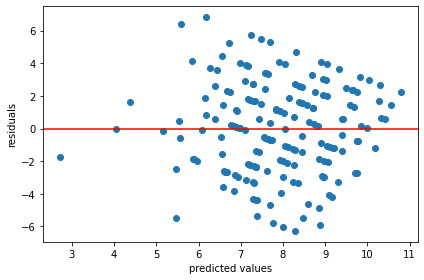

In [16]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

In the above ordinary least squares (OLS) regression model we see that there is generally no pattern in the residuals, which is a good thing.  It also tells us that there is not an obvious change we can make to the features such as taking the log of them or anything that would improve the model.  Looking at the residuals, it looks like the majority of teams are predicted to win between 6-10 games, which makes sense as most teams do tend to be in that range.  The R-squared of the linear regression model turned out to be ~0.216 - not the best.  This says that roughly 21.6% of the variation in wins is explained by the variation in the money spent on QB, RB, WR, TE, OL, DL, LB, S, CB, SpecialTeams, and the calculated PercentUsed.  The interpretation of the coefficients for QB, RB, WR, TE, OL, DL, LB, S, CB, and SpecialTeams is for a single dollar increase in spending on each of them, wins increase by the value of the coefficient.  For PercentUsed, for each additional percent used the number of wins increases by 0.164 since we modeled percentages as decimals.

I decided to go with these columns because the others such as Offense, Defense, Total, DeadMoney, and CapMax are contained in the features I used.  For example, Offense is simply the sum of QB, RB, WR, TE, OL - so adding it will only duplicate information in the model, the same for defense and total - they do not add any futher information.  DeadMoney and CapMax are both captured in the PercertUsed column - PercentUsed is the same as Total / CapMax, and The difference between total and CapMax is DeadMoney.  

The results of this model lead me to believe that mabe these features aren't the best at predicting the number of wins for a given NFL team.  So, I try some feature selection techniques to see if we can get a better model by using different predictors:

In [17]:
# Below code taken from lecture notes... and modified a bit to test with this project
def model_experiment(num_iter = 5, 
                     models = ['ols', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    #make sure X and y start out set correctly
    X_train, X_test = train_test_split(df, test_size = 0.2) # splits the data into two parts with 1:4 ratio
    X = X_train[['QB','RB', 'WR', 'TE', 'OL', 'DL', 'LB', 'S', 'CB', 'SpecialTeams', 'PercentUsed']]
    y = X_train.Wins
    
    x_axis = np.arange(num_iter)
    y_ols_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'ols' in models:
            lr = LinearRegression()

            lr.fit(X_train, y_train)
            
            sample_models['ols'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_ols_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #         print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'ols' in models:
        plt.plot(y_ols_test, label = 'ols')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_ols_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    return sample_models


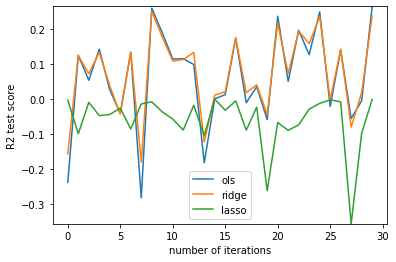

In [18]:
trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'simple', degree = 3)

I use the above code to run 30 iterations (randomness in iterations comes from the randomness of the train/test split) for ols, ridge, and lasso regression models.  OLS seeks to minimize the sum of the squared residuals:
 
 $$ J(\beta) = \sum\limits_{i=0}^{n} (y_{i} - \beta_{0} - \beta_{1}X_{i1} - \beta_{2}X_{i2} - \cdots - \beta_{p}X_{ip})^{2} $$
 
where i is the ith observation, n is the total number of observations, y sub i is the actual win total for the ith observation, B sub 0 is the intercept, B sub 1...p are the coefficients for each feature, and X sub 1..p is the feature value of the pth feature for the ith observation.

Meanwhile, ridge seeks to minimize:
$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p} \beta_{i}^{2} $$

And lasso seeks to minimize:
$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p}| \beta_{i} | $$


Ridge and lasso regression are good to try when the model contains high variation, with colinearity and too many variables.  This seems to be a good place to try it since in this model there is certainly both colinearity and many varibles.  The colinearity comes from the fact that these features are not entirely independent of each other.  For example, due to the salary cap, if a team spends more money on a quarterback it follows that they will have to spend less elsewhere to stay within the cap which leads to a relationship between each of the individual features.  There too are many variables - not just one or two, we try to use 11 in this model.  Of the 11, of the original OLS we tried, only 1 was statistacally different from 0.

Ridge helps to reduce overfitting by penalizing complexity/large coefficients (by adding more to the sum the larger the coefficient is) .  This reduces the complexity of the model, reduces the variance, and helps with the colinearity but is not as useful when we have a lot of features.  Lasso performs similarly except that it has a feature selection property that ridge does not have.  I also experimented with different lambda levels and this lambda of 15 seemed like it tended to yeild the highest r-squared values.

In our case, we can see from the graph above that ridge regression performed very similarly to the ols model.  And that lasso performed worse, generally with an R-squared value at or below 0.  An R-squared value less than 0 can be interpreted to mean that the model is worse than just guessing every prediction to be the mean value of wins.  This is not suprising for lasso since in our model, only 1 feature was statistically significant, and with the features being reduced in lasso, it ignores all of them since they do not clearly show a relationship to wins - with that approach our model is no better at predicting wins than simply guessing the mean number of wins for every observation.


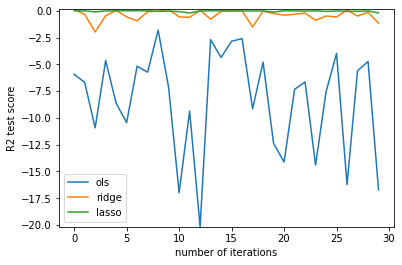

In [19]:
trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 3)

We can try to run the models again this time using polynomials to create a new feature matrix that has all of the polynomial combinations of the features up to and including the degree specified.  As we can see from the graph above, polynomial is clearly worse than the simple linear regression as the r-squared values are generally negative showing the model is no better than a guess of the mean.  It follows that there is not a polynomial relationship between these features and wins for the model to use.

In [20]:
# After run model_experiment we can look at the coeficient results
lr_ols = trained_models['ols']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']

# check the coefficients from Lasso and Ridge
print(lr_ridge.coef_)
print(lr_lasso.coef_)

[ 0.00000000e+00  2.74026191e-01 -8.44961218e-03  1.70807860e-01
 -2.06778542e-01 -1.97767636e-01  2.30806758e-01  7.31409032e-02
  6.44456203e-02  6.98155871e-02 -3.83233775e-01  3.78876112e-01
  6.15664995e-02 -8.69795643e-02  3.56704751e-02  1.09825549e-01
 -2.35689280e-03  1.63046781e-01  7.89427013e-02  2.00300013e-01
  1.72045695e-01 -5.01018325e-02  2.74614653e-01  1.05217133e-01
  4.41550025e-02 -2.06820793e-01 -4.93891339e-02  1.88350127e-01
  2.15161852e-01 -2.31928413e-02 -1.11140624e-01 -1.06471772e-01
 -1.72171596e-02  1.10635183e-01  4.47121239e-02  5.14397672e-02
 -2.07443206e-02  3.62278637e-02 -3.21912212e-02  1.17735856e-01
 -1.22777222e-01  8.37286608e-02 -1.04705047e-01  4.87801093e-02
 -2.30640116e-02 -8.16640754e-02  1.97400699e-02 -1.36162152e-01
 -1.04585238e-01 -7.06694889e-02 -7.76050886e-02  1.15157635e-01
 -1.61350245e-01  8.59383054e-03 -1.47217096e-01 -9.90842596e-02
  1.54359555e-04  7.45076523e-02  2.53850474e-02  1.78099358e-01
  1.75642418e-02 -8.72397

The results of these coeficients agree with what we saw in the graphs.  The ridge regression results are non-zero and contain an attempt to predict wins, which perform similar to OLS in the simple model.  For the second array (the lasso results) we see nothing but zeros.  The lasso regression finds nothing statistically significant and ignores all our features resulting in r-squared values scattered around 0.

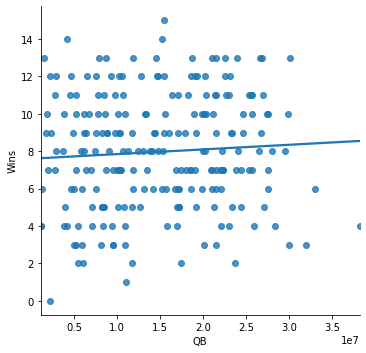

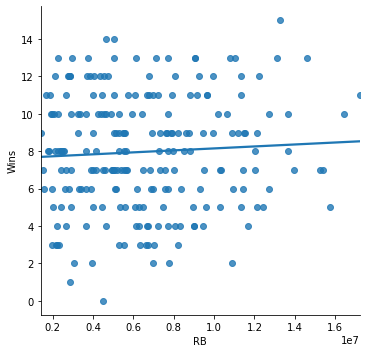

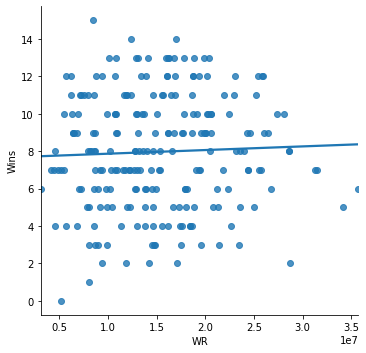

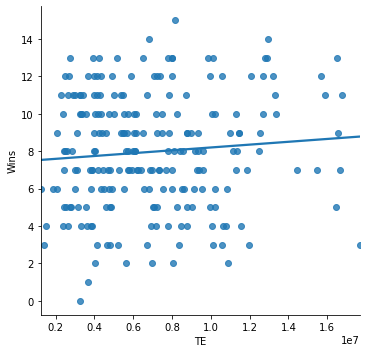

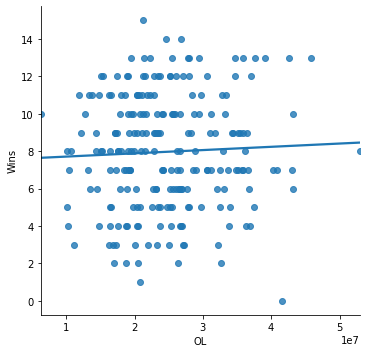

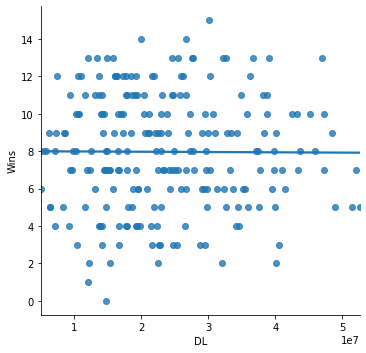

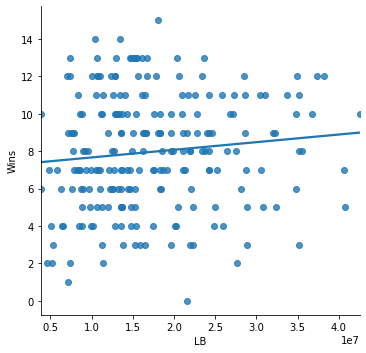

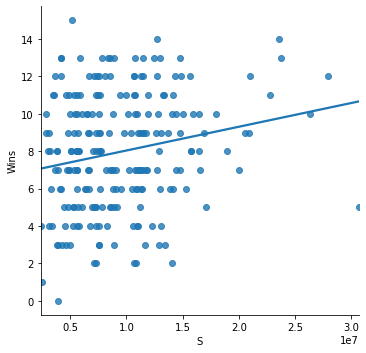

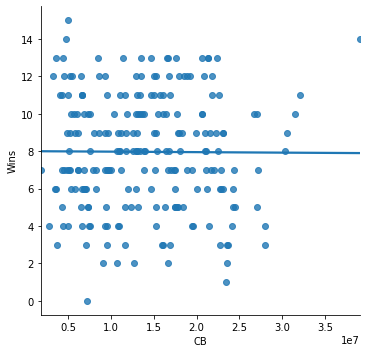

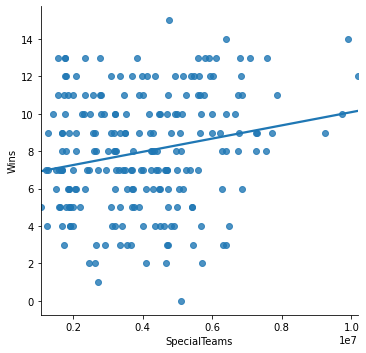

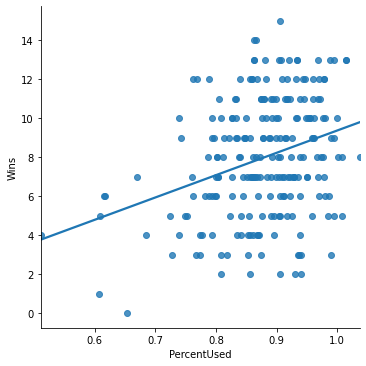

In [21]:
## let's use seaborn to plot a regression line
for position in ['QB','RB', 'WR', 'TE', 'OL', 'DL', 'LB', 'S', 'CB', 'SpecialTeams', 'PercentUsed']:
    sns.lmplot(x = position, y = 'Wins', data = df, ci = 0)
    plt.draw()

Another experiment I did is shown above: I can graph the relationship between a specific predictor such as QB and wins.  This can be done for each individual predictor.  The takeaway is similar to what the regression model shows - potentially a slight relationship, but not much of one.  The slope of the line of best fit above is close to 0 (it is relatively flat) showing that the amount spent on QB does not have that much of an impact on the number of wins.

If we take a look at all of the plots, we clearly see that the one with the steepest slope and therefore most obvious impact on Wins is the PercentUsed feature, which aggrees with our linear regression results.

With linear regression not explaining a ton of the variance in wins, we turn to make this into a classification problem with a hope of learning more or seeing if we can get an accuracy better than random guessing:

In [22]:
#Function to Draw tree taken from python utils file

def draw_tree(estimator, figsize =(15, 5), feature_names = ["Hits", "Years"]):
    """
    Takes a decision  tree estimator and plots it's tree structure
    :param estimator: A sklearn decision tree estimator. Should be fitted.
    :param figsize: tuple. (int, int).
    :param feature_names:
    :return: It returns a plot. The image is not saved.
    """
    fig = plt.figure(figsize= figsize)
    _ = tree.plot_tree(estimator,
                       feature_names= feature_names,
                       filled=True)

[[ 2  6  3]
 [ 1 10  8]
 [ 1  8  6]]
              precision    recall  f1-score   support

         Bad       0.50      0.18      0.27        11
        Good       0.42      0.53      0.47        19
    Mediocre       0.35      0.40      0.38        15

    accuracy                           0.40        45
   macro avg       0.42      0.37      0.37        45
weighted avg       0.42      0.40      0.39        45



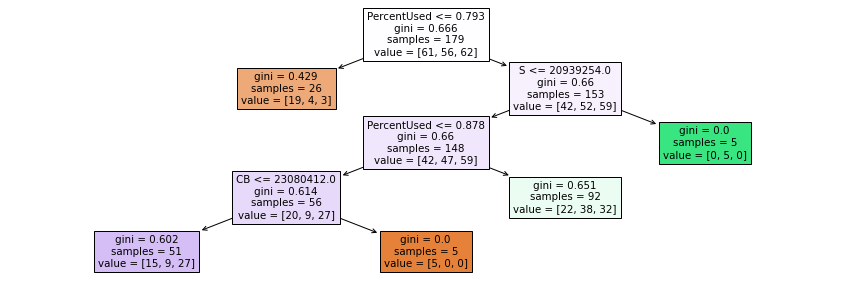

In [23]:
## here let's apply sklearn DecisionTreeClassifier

#drop the columns that are not predictors
X = df.drop(['Team', 'Year', 'Wins', 'Losses', 'Ties', 'Classification', 'Offense', 'Defense', 'Total', 'DeadMoney', 'CapMax'], axis=1)
y = df['Classification'] #set the goal to be the classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #split the data

classifier = DecisionTreeClassifier(max_leaf_nodes= 5) #create the classifier and fit it
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  #predict using the test data for metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

draw_tree(classifier,feature_names= X_train.columns)

The results of the decision tree do not look promising either.  The accuracy is 0.33 which is 1/3 and of one of our 3 categories is no better than a 1/3rd chance of randomly guessing a classification.  In this experiment I made the max leaf nodes stop at 5 so that the top of the tree could more clearly be seen and interpreted.  In attempt to try to make the decisino tree better I attempt another experiment using corss validation next.  The top left of the output also contains a confusion matrix.  The vertical axis of this table is the actual classification and the horizontal is the predicted.  So, the numbers along the diagnal are the correctly classified ones.  The accuracy is therefore the sum of the numbers along the diagnal divided by the total sum.  Recall refers to a horizontal row within the confusion matrix - for actual class 0, there were 1+5+4 of the actual class and only 1 was classified correctly so recall is 1/10 or 0.1.  Precision refers to a vertical column in the confusion matrix - for predicted class 0, there were 1+1+4 predicted as class 0, and only 1 was classified correctly, so precision is 1/6 or 0.17.

In [24]:
depth = []
for i in range(3,100):
    clf = tree.DecisionTreeClassifier(max_depth=i, ccp_alpha = 0, criterion = "entropy", min_impurity_split = 0.5)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
for elements in depth:
    print("Depth: " + str(elements[0]) + " with accuracy of: " + str(elements[1]))

Depth: 3 with accuracy of: 0.3539525691699605
Depth: 4 with accuracy of: 0.316798418972332
Depth: 5 with accuracy of: 0.3353754940711463
Depth: 6 with accuracy of: 0.3756916996047431
Depth: 7 with accuracy of: 0.37984189723320155
Depth: 8 with accuracy of: 0.37114624505928856
Depth: 9 with accuracy of: 0.358300395256917
Depth: 10 with accuracy of: 0.358102766798419
Depth: 11 with accuracy of: 0.32608695652173914
Depth: 12 with accuracy of: 0.38003952569169963
Depth: 13 with accuracy of: 0.34545454545454546
Depth: 14 with accuracy of: 0.3758893280632411
Depth: 15 with accuracy of: 0.358300395256917
Depth: 16 with accuracy of: 0.37213438735177873
Depth: 17 with accuracy of: 0.3543478260869565
Depth: 18 with accuracy of: 0.366798418972332
Depth: 19 with accuracy of: 0.358695652173913
Depth: 20 with accuracy of: 0.3669960474308301
Depth: 21 with accuracy of: 0.3535573122529644
Depth: 22 with accuracy of: 0.3492094861660079
Depth: 23 with accuracy of: 0.358300395256917
Depth: 24 with accura

There are many reasons I decided to use cross-validation.  First, compared to a leave-one-out approach, it is more computationally friendly.  Second, there are many benefits of using it.  The goal of machine learning is to minimize the error in the tests, which are predicting/classifying for never seen before data.  When using cross validation, all data is used as both training and testing data as in our 10-fold cross validation, 10 different models are created for each depth, using 10% of the data for testing in each model and 90% for training.  Each increment of the 10% test data is stepped through, with the remaining 90% being the training data.  So, every data observation is used for testing at least once and every observation is used for training k-1 times.  When we have a bunch of weaker models, the thought is to potentially combine them into one stronger model.  Since we have seen so far with modeling this data that it is relatively weak, cross validation sounds like an excellent idea.

Another benefit is its balance for the variance-bias trade-off.  It has lower bias than just a single validation set approach since a single validation set approach is more dependent on how good the random split of the test and training sets was.  It also has lower variance than leave-one-out-cross-validation (LOOCV) as the model is more generalized rather than overfitting by training with all but one observation in the data.

Looking at the results of the cross-validated decision trees it looks like the accuracy tends to be around 36-38% which is better than the random guessing of 33% but still does not tell us a whole lot about predicting whether a team is good, bad, or mediocre.  It goes along the same results as the linear regression showed - the model tells us a little bit, but not a whole lot.

In turn, we look to see what we can get out of these decision tree results.  Decision trees are built based on splitting each division by what will give the least amount of impurity.  We can use one of two techniques: Gini or Entropy.

Gini is measured by:

$\large G = 1 - \Sigma_i p_{i}^2$,

Where $p_{i}$ is the fraction of items labeled with class $i$ in the set.

We determine the information gain by calculating the entropy.  Entropy is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

Both Gini and Entropy are measures of impurity and used to calculate information gain.  Entropy is always between 0 and 1, the closer it is to 0 the better.  The higher the entropy, the more disordered the group is.  Information gain is the entropy of the parent group minus the entropy of the split so performance is maximized by minimizing the splits entropy.  It follows that when decision trees are created, they examine the entropy/gini of all possible splits, and choose the split with the highest information gain.

Knowing this, we can get something out of our decision tree results.  In the graphic I created we see the root split is split based off of the PercentUsed feature.  Then at the third level, PercentUsed is again used on another split.  It follows that clearly the PercentUsed feature has the largest impact on wins - this interpretation agrees with what we saw in the linear regression.

Let's see if we can find the optimal decision tree:



In [25]:
#Grid Search CV
#lets find the optimal Decision tree model using grid search
grid = {'max_leaf_nodes': [5, 10, 15, 20, 25, 100], 'ccp_alpha': [0, 0.01, 0.1, 1, 10, 100], 'criterion' : ['gini', 'entropy'], "min_impurity_split":[0,0.1,0.2,0.3,0.4,0.5]}
grid_search_cv = GridSearchCV(estimator = classifier, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impuri

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=20, min_impuri

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impuri

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=25, min_impuri

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_n

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=en

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy,

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=en

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=en

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=en

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=en

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0, c

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_no

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criter

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_al

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.1s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.01, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=5

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.1s
[CV] ccp_alpha=0.1, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.2s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, m

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1,

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, cr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.0s
[CV] ccp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=0.1, criter

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=0.1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=10, min_impuri

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=15, min_impuri

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=20, min_impurity

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_sp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=gini, max_leaf_nodes=100

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=en

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=1, criterion=en

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=1, criterion=en

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_no

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=1, criterion=entr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.5 
[CV]  ccp_alpha=1, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=1, c

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=5, min_impuri

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=10

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=15

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=20

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=25

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=gini, max_leaf_nod

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_le

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, ma

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=10, criterio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=10, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=10, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=10, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=10, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_spl

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_l

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=100, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=5, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, c

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.1, total=   0.0s
[CV] ccp_alpha=100

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0, total=   0.0s
[CV] ccp_alpha=100, criterio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0, total=   0.0s
[CV] ccp_alp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=20, min_impurity_split=0.5, total=   0.0s
[CV] ccp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.0s
[CV] ccp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.2, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.0s
[CV] ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3 
[CV]  ccp_alpha=100, criterion=entropy, max_leaf_nodes=100, min_impurity_split=0.3, total=   0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

{'mean_fit_time': array([ 0.00400381,  0.00442901,  0.00555902,  0.0033607 ,  0.00496244,
         0.00952444,  0.00362725,  0.00430217,  0.00319304,  0.00322752,
         0.00314198,  0.00425038,  0.00821915,  0.00383091,  0.00361204,
         0.0066195 ,  0.00451312,  0.00684695,  0.01138539,  0.00435252,
         0.00440068,  0.00483122,  0.00409951,  0.00609045,  0.01540961,
         0.01118903,  0.00709214,  0.01174817,  0.00650196,  0.00470738,
         0.00570207,  0.0115694 ,  0.00861015,  0.00558934,  0.00480762,
         0.00682874,  0.00447536,  0.00441666,  0.00728617,  0.00487614,
         0.00463705,  0.00479312,  0.00656247,  0.00460134,  0.00446548,
         0.00478249,  0.00531306,  0.00471587,  0.00458422,  0.0073504 ,
         0.00504289,  0.00483913,  0.00678468,  0.00516276,  0.00489702,
         0.00523634,  0.00737605,  0.00506239,  0.00516305,  0.00639224,
         0.00512042,  0.0046464 ,  0.00582643,  0.00566978,  0.00504537,
         0.00479374,  0.00602813, 

In [22]:
#see the results in a table, sorted by descending mean test score
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,71,143,24,139,23,35,70,75,72,2,...,261,260,259,431,137,19,90,91,21,93
mean_fit_time,0.00634804,0.00581799,0.00951929,0.00767584,0.006951,0.0044827,0.0063623,0.0120388,0.00457826,0.00423927,...,0.00475249,0.00483665,0.0116882,0.00647049,0.0100719,0.010013,0.0110198,0.00384364,0.00459661,0.00673914
std_fit_time,0.00162773,0.00111117,0.00463993,0.00601599,0.00130042,0.0010712,0.00161364,0.0109325,0.000811282,0.00122825,...,0.0012923,0.000761291,0.0144831,0.00234389,0.0044168,0.00281724,0.0104641,0.000286926,0.000495127,0.00429385
mean_score_time,0.0035398,0.00506597,0.00279899,0.00353217,0.00408244,0.00299344,0.00330162,0.00458899,0.00447927,0.0023663,...,0.00287004,0.00276957,0.00223637,0.00433049,0.00365138,0.00483785,0.00848079,0.00292544,0.00234156,0.00278163
std_score_time,0.00102527,0.00325993,0.000644795,0.00267686,0.00117387,0.00139247,0.000900724,0.00359816,0.00326764,0.000744023,...,0.00154648,0.00153392,0.00031035,0.0042175,0.000380346,0.000839986,0.0076513,0.00140867,0.00018966,0.00124601
param_ccp_alpha,0,0.01,0,0.01,0,0,0,0.01,0.01,0,...,1,1,1,100,0.01,0,0.01,0.01,0,0.01
param_criterion,entropy,entropy,gini,entropy,gini,gini,entropy,gini,gini,gini,...,entropy,entropy,entropy,entropy,entropy,gini,gini,gini,gini,gini
param_max_leaf_nodes,100,100,25,100,20,100,100,5,5,5,...,10,10,10,100,25,20,20,20,20,20
param_min_impurity_split,0.5,0.5,0,0.1,0.5,0.5,0.4,0.3,0,0.2,...,0.3,0.2,0.1,0.5,0.5,0.1,0,0.1,0.3,0.3
params,"{'ccp_alpha': 0, 'criterion': 'entropy', 'max_...","{'ccp_alpha': 0.01, 'criterion': 'entropy', 'm...","{'ccp_alpha': 0, 'criterion': 'gini', 'max_lea...","{'ccp_alpha': 0.01, 'criterion': 'entropy', 'm...","{'ccp_alpha': 0, 'criterion': 'gini', 'max_lea...","{'ccp_alpha': 0, 'criterion': 'gini', 'max_lea...","{'ccp_alpha': 0, 'criterion': 'entropy', 'max_...","{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...","{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...","{'ccp_alpha': 0, 'criterion': 'gini', 'max_lea...",...,"{'ccp_alpha': 1, 'criterion': 'entropy', 'max_...","{'ccp_alpha': 1, 'criterion': 'entropy', 'max_...","{'ccp_alpha': 1, 'criterion': 'entropy', 'max_...","{'ccp_alpha': 100, 'criterion': 'entropy', 'ma...","{'ccp_alpha': 0.01, 'criterion': 'entropy', 'm...","{'ccp_alpha': 0, 'criterion': 'gini', 'max_lea...","{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...","{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...","{'ccp_alpha': 0, 'criterion': 'gini', 'max_lea...","{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_..."
split0_test_score,0.354839,0.354839,0.387097,0.387097,0.322581,0.322581,0.354839,0.387097,0.387097,0.387097,...,0.322581,0.322581,0.322581,0.322581,0.322581,0.354839,0.290323,0.354839,0.322581,0.290323


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[[4 3 4]
 [5 6 8]
 [5 2 8]]
              precision    recall  f1-score   support

         Bad       0.29      0.36      0.32        11
        Good       0.55      0.32      0.40        19
    Mediocre       0.40      0.53      0.46        15

    accuracy                           0.40        45
   macro avg       0.41      0.40      0.39        45
weighted avg       0.43      0.40      0.40        45



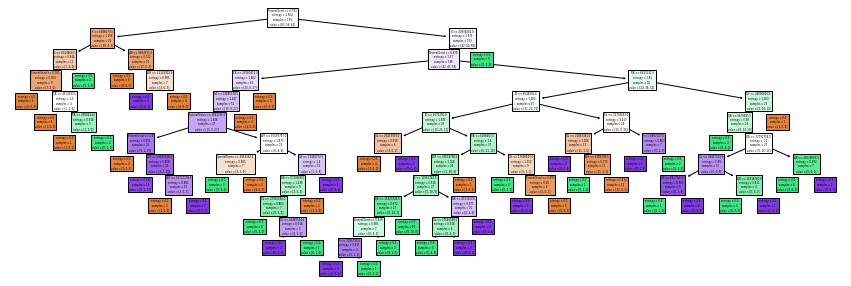

In [26]:
classifier = DecisionTreeClassifier(max_leaf_nodes= 100, ccp_alpha = 0, criterion = "entropy", min_impurity_split = 0.5) #create the classifier and fit it
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  #predict using the test data for metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

draw_tree(classifier,feature_names= X_train.columns)

I used GridSearchCV to run 432 candidate models from 2160 fits to find the optimal decision tree model.  The goal is to maximize the test accuracy so I sorted by the mean_test_score.  This statistic is the mean test score for the accuracy of the 5 cross-validated models that GridSearchCV fit.  In this case I was able to get the accuracy up to 46%.  In this model the differences between it and the default model is the max_leaf_nodes being set to 100 (from default None), the min_impurity_split being set to 0.5 (instead of the default 0), and the criterion set to entropy instead of the default Gini.  The max leaf nodes of 100 gives the tree room to grow and fit the data, but does put a limit on the number so that we prevent overfitting.  The min_impurity_split is the threshold for early stopping in tree growth - a node will split if its impurity is above the threshold, otherwise it is a leaf.  This also serves to prevent overfitting.  With these decision trees, if there is no min_impurity_split or max leaf nodes, the training accuracy will always be 1 as it would fit formly to the training data.  This does not do the best job generalizing, and our goal is to maximize the test set accuracy, so we avoid overfitting here and create the optimal model.

In [27]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)


#Can use this code to test a single model
## here let's apply sklearn DecisionTreeClassifier
X = df.drop(['Team', 'Year', 'Wins', 'Losses', 'Ties', 'Classification', 'Offense', 'Defense', 'Total', 'DeadMoney', 'CapMax'], axis=1)
y = df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#can test again with cross-validation here:
depth = []
for i in range(3,11,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=knn, X=X, y=y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
for elements in depth:
    print("Depth: " + str(elements[0]) + " with accuracy of: " + str(elements[1]))


Accuracy: 0.37777777777777777
Depth: 3 with accuracy of: 0.3312252964426878
Depth: 5 with accuracy of: 0.33517786561264823
Depth: 7 with accuracy of: 0.3762845849802372
Depth: 9 with accuracy of: 0.3264822134387352


The KNN model vectorizes/plots the features and their classifications, and whatever points the new test observation is closest to, the closest k points vote for a classification for the new observation.  This is a form of supervised learning and the hope was that it might capture the combination of the features better.

Lets try a few things to make KNN a better model:

In [28]:
#scale the data using the standard scaler
#KNN may perform better with scaled data whereas it wasn't necessary for decision trees
std_scaler = StandardScaler()

std_scaler.fit(X_train) ## training_mean and std calculated
X_train_scaled = std_scaler.transform(X_train) ## only use training mean and std


## Never fit onto Test data!! Only Transform
X_test_scaled  = std_scaler.transform(X_test)

In [29]:
#Grid Search CV
#Lets find the optimal KNN model
grid = {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'], 'p' : [1, 2]}
grid_search_cv = GridSearchCV(estimator = knn, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train_scaled, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................
[CV] .............. n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................
[CV] .............. n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................
[CV] .............. n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................
[CV] ............. n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................
[CV] ............. n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................
[CV] ............. n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.0s finished


{'mean_fit_time': array([0.00269156, 0.00240436, 0.00190053, 0.00300698, 0.0020432 ,
        0.00255203, 0.00153384, 0.00209556, 0.00283589, 0.00270553,
        0.00163937, 0.00314045]),
 'std_fit_time': array([0.00115931, 0.00183706, 0.00025472, 0.00116355, 0.00070186,
        0.00181734, 0.00032627, 0.00028804, 0.00225173, 0.00067287,
        0.00026333, 0.00116126]),
 'mean_score_time': array([0.00596867, 0.00355186, 0.00741978, 0.00346937, 0.00365944,
        0.00326862, 0.00402198, 0.00247846, 0.00571623, 0.00267978,
        0.00530076, 0.00731473]),
 'std_score_time': array([0.00087681, 0.00117238, 0.00380396, 0.00069174, 0.0001337 ,
        0.00088322, 0.00076485, 0.00046421, 0.00209863, 0.00017292,
        0.00144508, 0.00761979]),
 'param_n_neighbors': masked_array(data=[3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obje

In [30]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,4,10,6,11,7,0,8,5,9,2,3,1
mean_fit_time,0.0020432,0.00163937,0.00153384,0.00314045,0.00209556,0.00269156,0.00283589,0.00255203,0.00270553,0.00190053,0.00300698,0.00240436
std_fit_time,0.000701863,0.000263333,0.000326272,0.00116126,0.00028804,0.00115931,0.00225173,0.00181734,0.000672869,0.000254724,0.00116355,0.00183706
mean_score_time,0.00365944,0.00530076,0.00402198,0.00731473,0.00247846,0.00596867,0.00571623,0.00326862,0.00267978,0.00741978,0.00346937,0.00355186
std_score_time,0.000133702,0.00144508,0.000764847,0.00761979,0.000464212,0.000876812,0.00209863,0.000883219,0.000172923,0.00380396,0.000691735,0.00117238
param_n_neighbors,5,7,5,7,5,3,7,5,7,3,3,3
param_p,1,2,2,2,2,1,1,1,1,2,2,1
param_weights,uniform,uniform,uniform,distance,distance,uniform,uniform,distance,distance,uniform,distance,distance
params,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}","{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}","{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}","{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}","{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}","{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}"
split0_test_score,0.416667,0.527778,0.416667,0.527778,0.444444,0.361111,0.361111,0.388889,0.388889,0.388889,0.388889,0.333333
split1_test_score,0.333333,0.305556,0.444444,0.277778,0.388889,0.388889,0.361111,0.305556,0.305556,0.388889,0.388889,0.305556


In [31]:
#Create optimal KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3, p = 2, weights = 'uniform') #the other optimal parameters are all the defaults

#Train the model using the training sets
knn.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


In [32]:
cv_fivefold = cross_validate(estimator= knn, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             n_jobs= -1, 
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [33]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

#this should be similar to what we saw in the grid search table
print('KNN 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

KNN 5-fold cv results (Accuracy) 0.352 =/- 0.061


In this case, as seen in the GridSearchCV output as a table, model 2 was the best mean_test_score at 39.9%.  This is much better than the 33% we got for guessing and does accomplish our goal to have the model do better than guessing.  There is an amount of randomness to it based on the random splits of the train and test data for the cross validation.  For this, the GridSearchCV fit 12 candidates, each 5 times for a total of 60 models.  The best used parameters of the 3 nearest neighbors to vote on the classification, uniform weights for the distance (choosing to not weight the decision by how close the other points were), and p = 2 which is the default for using euclidean distance.  This model proved to be better than guessing, but the decision tree model had a higher mean_test_score.

Next, lets try logistic regression:


In [34]:
#now lets try some different parameters
lr = LogisticRegression(penalty = None) #Just create a lr model

In [35]:
#Grid Search CV
#now lets try to find the best parameters for logistic regression
grid = {'C': [0.0000000000001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'none'], 'solver' : ['saga', 'lbfgs', 'sag', 'newton-cg'], "max_iter":[100,1000]}
grid_search_cv = GridSearchCV(estimator = lr, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train_scaled, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=1e-13, max_iter=100, penalty=l1, solver=saga ..................
[CV] ... C=1e-13, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l1, solver=saga ..................
[CV] ... C=1e-13, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l1, solver=saga ..................
[CV] ... C=1e-13, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l1, solver=saga ..................
[CV] ... C=1e-13, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l1, solver=saga ..................
[CV] ... C=1e-13, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l1, solver=lbfgs .................
[CV] .. C=1e-13, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l1, solver=lbfgs .................
[CV] .. C=1e-1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penal

[CV]  C=1e-13, max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l2, solver=newton-cg .............
[CV]  C=1e-13, max_iter=100, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1e-13, max_iter=100, penalty=l2, solver=newton-cg .............
[CV]  C=1e-13, max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l2, solver=newton-cg .............
[CV]  C=1e-13, max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=l2, solver=newton-cg .............
[CV]  C=1e-13, max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=none, solver=saga ................
[CV] . C=1e-13, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=none, solver=saga ................
[CV] . C=1e-13, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=100, penalty=none, solver=saga .............

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV] .. C=1e-13, max_iter=1000, penalty=l2, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=l2, solver=saga .................
[CV] .. C=1e-13, max_iter=1000, penalty=l2, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=l2, solver=saga .................
[CV] .. C=1e-13, max_iter=1000, penalty=l2, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs ................
[CV] . C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs ................
[CV] . C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs ................
[CV] . C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs ................
[CV] . C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=l2, solver=lbfgs ................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packag


[CV] C=1e-13, max_iter=1000, penalty=l2, solver=newton-cg ............
[CV]  C=1e-13, max_iter=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=l2, solver=newton-cg ............
[CV]  C=1e-13, max_iter=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=none, solver=saga ...............
[CV]  C=1e-13, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=none, solver=saga ...............
[CV]  C=1e-13, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=none, solver=saga ...............
[CV]  C=1e-13, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=none, solver=saga ...............
[CV]  C=1e-13, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=none, solver=saga ...............
[CV]  C=1e-13, max_iter=1000, penalty=none, solver=saga, total=   0.0s

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV]  C=1e-13, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=none, solver=newton-cg ..........
[CV]  C=1e-13, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=none, solver=newton-cg ..........
[CV]  C=1e-13, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=1e-13, max_iter=1000, penalty=none, solver=newton-cg ..........
[CV]  C=1e-13, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ......

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV] ..... C=0.01, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV] ..... C=0.01, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV] ..... C=0.01, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV] ..... C=0.01, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt


[CV] C=0.01, max_iter=100, penalty=none, solver=lbfgs ................
[CV] . C=0.01, max_iter=100, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=none, solver=sag ..................
[CV] ... C=0.01, max_iter=100, penalty=none, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=none, solver=sag ..................
[CV] ... C=0.01, max_iter=100, penalty=none, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=none, solver=sag ..................
[CV] ... C=0.01, max_iter=100, penalty=none, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=none, solver=sag ..................
[CV] ... C=0.01, max_iter=100, penalty=none, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=none, solver=sag ..................
[CV] ... C=0.01, max_iter=100, penalty=none, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=none, solver=newton-cg ............
[CV]  C=0.01, max_iter=100, penalty=none, solver=newton-cg, total=   0.0s
[C

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV]  C=0.01, max_iter=100, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=none, solver=newton-cg ............
[CV]  C=0.01, max_iter=100, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=none, solver=newton-cg ............
[CV]  C=0.01, max_iter=100, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1, solver=saga ..................
[CV] ... C=0.01, max_iter=1000, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1, solver=saga ..................
[CV] ... C=0.01, max_iter=1000, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1, solver=saga ..................
[CV] ... C=0.01, max_iter=1000, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1, solver=saga ..................
[CV] ... C=0.01, max_iter=1000, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l1, solver=saga ................

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

[CV] .... C=0.01, max_iter=1000, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=newton-cg .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=newton-cg .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=newton-cg .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=newton-cg .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=newton-cg .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=none, solver=saga ................
[CV] . C=0.01, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=none, solver=saga .............

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV]  C=0.01, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=none, solver=newton-cg ...........
[CV]  C=0.01, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=none, solver=newton-cg ...........
[CV]  C=0.01, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.01, max_iter=1000, penalty=none, solver=newton-cg ...........
[CV]  C=0.01, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................
[CV] ..... C=0.1, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................
[CV] ..... C=0.1, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................
[CV] ..... C=0.1, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ...........

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

[CV] .... C=0.1, max_iter=100, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV] .... C=0.1, max_iter=100, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV] ...... C=0.1, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV] ...... C=0.1, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV] ...... C=0.1, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV] ...... C=0.1, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV] ...... C=0.1, max_iter=100, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV] .. C=0.1, max_iter=100, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=none, solver=lbfgs .................
[CV] .. C=0.1, max_iter=100, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=none, solver=lbfgs .................
[CV] .. C=0.1, max_iter=100, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=none, solver=lbfgs .................
[CV] .. C=0.1, max_iter=100, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=none, solver=sag ...................
[CV] .... C=0.1, max_iter=100, penalty=none, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=none, solver=sag ...................
[CV] .... C=0.1, max_iter=100, penalty=none, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=none, solver=sag ...................
[CV] .... C=0.1, max_iter=100, penalty=none, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=none, solver=sag ...................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

[CV] .... C=0.1, max_iter=1000, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2, solver=saga ...................
[CV] .... C=0.1, max_iter=1000, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2, solver=saga ...................
[CV] .... C=0.1, max_iter=1000, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2, solver=saga ...................
[CV] .... C=0.1, max_iter=1000, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2, solver=saga ...................
[CV] .... C=0.1, max_iter=1000, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2, solver=lbfgs ..................
[CV] ... C=0.1, max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2, solver=lbfgs ..................
[CV] ... C=0.1, max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=l2, solver=lbfgs ..................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV] .. C=0.1, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=none, solver=lbfgs ................
[CV] . C=0.1, max_iter=1000, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=none, solver=lbfgs ................
[CV] . C=0.1, max_iter=1000, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=none, solver=lbfgs ................
[CV] . C=0.1, max_iter=1000, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=none, solver=lbfgs ................
[CV] . C=0.1, max_iter=1000, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=none, solver=lbfgs ................
[CV] . C=0.1, max_iter=1000, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=none, solver=sag ..................
[CV] ... C=0.1, max_iter=1000, penalty=none, solver=sag, total=   0.0s
[CV] C=0.1, max_iter=1000, penalty=none, solver=sag ..................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

[CV] ...... C=1, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV] ........ C=1, max_iter=100, penalty=l1, solver=sag, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV] ........ C=1, max_iter=100, penalty=l1, solver=sag, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV] ........ C=1, max_iter=100, penalty=l1, solver=sag, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

[CV] ....... C=1, max_iter=1000, penalty=l1, solver=sag, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=sag ......................
[CV] ....... C=1, max_iter=1000, penalty=l1, solver=sag, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=sag ......................
[CV] ....... C=1, max_iter=1000, penalty=l1, solver=sag, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=sag ......................
[CV] ....... C=1, max_iter=1000, penalty=l1, solver=sag, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV] . C=1, max_iter=1000, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV] . C=1, max_iter=1000, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV] . C=1, max_iter=1000, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver,

[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=sag ......................
[CV] ....... C=10, max_iter=100, penalty=l1, solver=sag, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=sag ......................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV] .... C=10, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=saga ...................
[CV] .... C=10, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=saga ...................
[CV] .... C=10, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=saga ...................
[CV] .... C=10, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=lbfgs ..................
[CV] ... C=10, max_iter=100, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=lbfgs ..................
[CV] ... C=10, max_iter=100, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=lbfgs ..................
[CV] ... C=10, max_iter=100, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=lbfgs ..................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

[CV]  C=10, max_iter=1000, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV] ... C=10, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV] ... C=10, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV] ... C=10, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV] ... C=10, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV] ... C=10, max_iter=1000, penalty=none, solver=saga, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=lbfgs .................
[CV] .. C=10, max_iter=1000, penalty=none, solver=lbfgs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=lbfgs .................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV] ..... C=100, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................
[CV] ..... C=100, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................
[CV] ..... C=100, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................
[CV] ..... C=100, max_iter=100, penalty=l1, solver=saga, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV] .... C=100, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV] .... C=100, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV] .... C=100, max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=100, penalty=none, solver=saga ..................
[CV] ... C=100, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=100, max_iter=100, penalty=none, solver=saga ..................
[CV] ... C=100, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=100, max_iter=100, penalty=none, solver=saga ..................
[CV] ... C=100, max_iter=100, penalty=none, solver=saga, total=   0.0s
[CV] C=100, max_iter=100, penalty=none, solver=saga ..................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV]  C=100, max_iter=100, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=100, max_iter=100, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=1000, penalty=l1, solver=saga ...................
[CV] .... C=100, max_iter=1000, penalty=l1, solver=saga, total=   0.0s
[CV] C=100, max_iter=1000, penalty=l1, solver=saga ...................
[CV] .... C=100, max_iter=1000, penalty=l1, solver=saga, total=   0.1s
[CV] C=100, max_iter=1000, penalty=l1, solver=saga ...................
[CV] .... C=100, max_iter=1000, penalty=l1, solver=saga, total=   0.1s
[CV] C=100, max_iter=1000, penalty=l1, solver=saga ...................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

[CV] .... C=100, max_iter=1000, penalty=l1, solver=saga, total=   0.0s
[CV] C=100, max_iter=1000, penalty=l1, solver=saga ...................
[CV] .... C=100, max_iter=1000, penalty=l1, solver=saga, total=   0.1s
[CV] C=100, max_iter=1000, penalty=l1, solver=lbfgs ..................
[CV] ... C=100, max_iter=1000, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=100, max_iter=1000, penalty=l1, solver=lbfgs ..................
[CV] ... C=100, max_iter=1000, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=100, max_iter=1000, penalty=l1, solver=lbfgs ..................
[CV] ... C=100, max_iter=1000, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=100, max_iter=1000, penalty=l1, solver=lbfgs ..................
[CV] ... C=100, max_iter=1000, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=100, max_iter=1000, penalty=l1, solver=lbfgs ..................
[CV] ... C=100, max_iter=1000, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=100, max_iter=1000, penalty=l1, solver=sag ....................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

[CV]  C=100, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=1000, penalty=none, solver=newton-cg ............
[CV]  C=100, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=1000, penalty=none, solver=newton-cg ............
[CV]  C=100, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s
[CV] C=100, max_iter=1000, penalty=none, solver=newton-cg ............
[CV]  C=100, max_iter=1000, penalty=none, solver=newton-cg, total=   0.0s


{'mean_fit_time': array([0.00375819, 0.00089946, 0.00064898, 0.00066905, 0.00439029,
        0.00720916, 0.00236068, 0.03354321, 0.00317411, 0.01162825,
        0.00507321, 0.01197319, 0.00197473, 0.00054746, 0.00051031,
        0.00049815, 0.0025722 , 0.00604692, 0.00408297, 0.03582563,
        0.00337939, 0.01067591, 0.0052556 , 0.01820283, 0.00270205,
        0.00081072, 0.0010654 , 0.00144863, 0.00328794, 0.00759721,
        0.00399461, 0.0393239 , 0.00740056, 0.01471319, 0.01169224,
        0.02482886, 0.00318494, 0.00127378, 0.00083928, 0.00051303,
        0.00327263, 0.00621772, 0.00265822, 0.0117291 , 0.00374103,
        0.0081996 , 0.00500035, 0.01773868, 0.00472617, 0.00077295,
        0.0005043 , 0.00057821, 0.00326905, 0.00775046, 0.00530086,
        0.01830597, 0.00503335, 0.01161819, 0.00435295, 0.01215568,
        0.003583  , 0.00038948, 0.00083604, 0.00041165, 0.00401077,
        0.00676942, 0.0028266 , 0.01256933, 0.00509496, 0.01184502,
        0.00503683, 0.0147346 ,

In [37]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,18,19,6,7,36,83,82,81,80,79,...,99,109,110,111,121,122,123,133,134,135
mean_fit_time,0.00408297,0.0358256,0.00236068,0.0335432,0.00318494,0.0125988,0.00440598,0.00822983,0.00350862,0.0126453,...,0.000574398,0.00049324,0.000528908,0.000443316,0.000481462,0.000445509,0.000439215,0.000593472,0.000453377,0.000490618
std_fit_time,0.00223172,0.0106009,0.000275616,0.0163618,0.000936635,0.00118851,0.00042034,0.000882512,0.000636073,0.000811143,...,0.000246024,4.79373e-05,8.61431e-05,2.74153e-05,8.24179e-05,2.52722e-05,4.51123e-05,0.000234154,1.00675e-05,9.8398e-05
mean_score_time,0.000997972,0.000619173,0.000440168,0.000809765,0.00243678,0.000472927,0.000440168,0.000519085,0.000582409,0.00055809,...,0,0,0,0,0,0,0,0,0,0
std_score_time,0.000407846,0.00016652,1.17057e-05,0.000117057,0.00213384,4.66194e-05,1.22375e-05,8.98013e-05,0.000244106,0.000143943,...,0,0,0,0,0,0,0,0,0,0
param_C,1e-13,1e-13,1e-13,1e-13,0.01,1,1,1,1,1,...,10,10,10,10,100,100,100,100,100,100
param_max_iter,1000,1000,100,100,1000,100,100,100,100,100,...,100,1000,1000,1000,100,100,100,1000,1000,1000
param_penalty,l2,l2,l2,l2,l1,none,none,none,none,l2,...,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1
param_solver,sag,newton-cg,sag,newton-cg,saga,newton-cg,sag,lbfgs,saga,newton-cg,...,newton-cg,lbfgs,sag,newton-cg,lbfgs,sag,newton-cg,lbfgs,sag,newton-cg
params,"{'C': 1e-13, 'max_iter': 1000, 'penalty': 'l2'...","{'C': 1e-13, 'max_iter': 1000, 'penalty': 'l2'...","{'C': 1e-13, 'max_iter': 100, 'penalty': 'l2',...","{'C': 1e-13, 'max_iter': 100, 'penalty': 'l2',...","{'C': 0.01, 'max_iter': 1000, 'penalty': 'l1',...","{'C': 1, 'max_iter': 100, 'penalty': 'none', '...","{'C': 1, 'max_iter': 100, 'penalty': 'none', '...","{'C': 1, 'max_iter': 100, 'penalty': 'none', '...","{'C': 1, 'max_iter': 100, 'penalty': 'none', '...","{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'so...",...,"{'C': 10, 'max_iter': 100, 'penalty': 'l1', 's...","{'C': 10, 'max_iter': 1000, 'penalty': 'l1', '...","{'C': 10, 'max_iter': 1000, 'penalty': 'l1', '...","{'C': 10, 'max_iter': 1000, 'penalty': 'l1', '...","{'C': 100, 'max_iter': 100, 'penalty': 'l1', '...","{'C': 100, 'max_iter': 100, 'penalty': 'l1', '...","{'C': 100, 'max_iter': 100, 'penalty': 'l1', '...","{'C': 100, 'max_iter': 1000, 'penalty': 'l1', ...","{'C': 100, 'max_iter': 1000, 'penalty': 'l1', ...","{'C': 100, 'max_iter': 1000, 'penalty': 'l1', ..."
split0_test_score,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.361111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Optimal LR model:
lr = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'saga', max_iter= 100)

In [39]:
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [40]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Logistic Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Logistic Regression 5-fold cv results (Accuracy) 0.347 =/- 0.069


The above logistic regression model uses GridSearchCV to run 144 candidates, totaling 720 fits.  Logistic regression is built off conditional probablility where we give a probability for each class given the features and take the highest one.  The optimal model used a C parameter of 0.1, the l1 penalty, saga solver, and 100 max iterations.  The 100 max iterations helps to reduce the chance of overfitting.  The C paramerter is the inverse of regularization strength and smaller values specify stronger regularization.  In this case, on average, the model predicted the correct classification 37.3% of the time which is better than random guessing but not by a whole lot.  This model also appears to be worse than the decision trees so we will throw this model out as well.

Lastly, lets look at a random forest:


In [41]:
#Lastly, lets do some experimentation with random forests

rf = RandomForestClassifier(n_estimators= 700, max_features='auto', max_depth= 10)

In [42]:
#Grid Search CV
#now lets try to find the best parameters for random forests
#this takes a pretty long time to run
#top commented out line takes longer to run but may give better results
#grid = {'n_estimators': [50,300,500,700], 'max_leaf_nodes': [5, 15, 25, 100], 'ccp_alpha': [0, 0.01, 0.1, 1, 10], 'criterion' : ['gini', 'entropy'], "min_impurity_split":[0,0.1,0.3,0.5], "n_jobs": [4]}
grid = {'n_estimators': [50,700], 'max_leaf_nodes': [15, 100], 'ccp_alpha': [0, 0.1], 'criterion' : ['gini'], "min_impurity_split":[0,0.1,0.5], "n_jobs": [4]}
grid_search_cv = GridSearchCV(estimator = rf, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train_scaled, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.2s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.1s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.1s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.1s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=50, n_jobs=4, total=   0.1s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=700, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=700, n_jobs=4, total=   0.9s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=700, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=15, min_impurity_split=0, n_estimators=700, n_jobs=4, total=   1.2s
[CV

[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0, n_estimators=700, n_jobs=4, total=   0.9s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, n_estimators=50, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, n_estimators=50, n_jobs=4, total=   0.1s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, n_estimators=50, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, n_estimators=50, n_jobs=4, total=   0.1s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, n_estimators=50, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, n_estimators=50, n_jobs=4, total=   0.1s
[CV] ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, n_estimators=50, n_jobs=4 
[CV]  ccp_alpha=0, criterion=gini, max_leaf_nodes=100, min_impurity_split=0.1, n_estimators=50, n_job

KeyboardInterrupt: 

In [42]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,6,7,23,9,17,14,15,1,3,16,...,4,10,12,0,20,22,8,11,5,2
mean_fit_time,0.18508,2.08925,1.15552,1.65817,1.29029,0.127043,1.30475,1.98629,1.90392,0.125848,...,0.215506,0.137899,0.147138,1.17012,0.151267,0.108317,0.213505,2.07555,2.67966,0.227003
std_fit_time,0.0160322,0.499603,0.0135451,0.399674,0.0551437,0.0133121,0.0376333,0.383178,0.271584,0.0153241,...,0.091062,0.0205976,0.0114964,1.89291,0.0224165,0.00506661,0.0855136,0.507178,0.447087,0.073693
mean_score_time,0.110001,0.230377,0.105478,0.165829,0.127014,0.104634,0.104811,0.227187,0.187324,0.104809,...,0.105191,0.103469,0.104818,0.105323,0.10445,0.104006,0.106427,0.165517,0.227497,0.106661
std_score_time,0.00762621,0.0434521,0.00148553,0.050537,0.0402331,0.00135398,0.00197869,0.0414805,0.0404442,0.0011377,...,0.00213059,0.00127954,0.00124829,0.0038673,0.0017671,0.00193175,0.00234321,0.0490567,0.0435503,0.00201188
param_ccp_alpha,0,0,0.1,0,0.1,0.1,0.1,0,0,0.1,...,0,0,0.1,0,0.1,0.1,0,0,0,0
param_criterion,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini,...,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini
param_max_leaf_nodes,100,100,100,100,15,15,15,15,15,15,...,15,100,15,15,100,100,100,100,15,15
param_min_impurity_split,0,0,0.5,0.1,0.5,0.1,0.1,0,0.1,0.5,...,0.5,0.5,0,0,0.1,0.5,0.1,0.5,0.5,0.1
param_n_estimators,50,700,700,700,700,50,700,700,700,50,...,50,50,50,50,50,50,50,700,700,50
param_n_jobs,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [43]:
#create the optimal random forest classifier

rf = RandomForestClassifier(max_leaf_nodes = 15, min_impurity_split = 0.5, n_estimators= 50, max_features='auto')

cv_fivefold = cross_validate(estimator= rf, 
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, 
                             verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.2

[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

In [44]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Random Forest 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Random Forest 5-fold cv results (Accuracy) 0.363 =/- 0.056


The above random forest is run for 24 candidates, resulting in 120 fits.  These random forests take much longer to run, so for simplicity and time I created two possible grids to run it with.  The first gives more candidate models, but takes a longer time to run while the second option that we use here only gives 120 fits and completes in minutes.  A random forest is a collection of decision trees, meant to be more robust than a single decision tree.  In the above results I see that the mean_test_score is ~0.35 which is still less than the accuracy of the single decision tree.  I think that these models are highly variable based on the randomness of the train test split.  From the cross-validated 5 models here it appears that decision trees seem to be the best model.  Please note that when you run it the results may be different.  I have seen standard deviations up to 0.05 - a 5% difference in accuracy is pretty large variation.  We set the max leaf nodes at 15 to avoid overfitting, and the min impurity split at 0.5 again to avoid overfitting, same as mentioned for the decision trees earlier if the information gain is not large enough we will just leave it as a leaf node.

In [ ]:
# Now we want to try it with deep learning

# Results and Discussion

Lets begin analysing the results with the linear regression model.  Looking at the coefficients, we see that only 1 of the features is statistically significant.  We can tell this in a few different ways.  First by looking at the 95% confidence intervals on the right, we see that all of the intervals for the features (except the const, since this is the intercept we ignore its significance) all span 0.  Due to this fact, we cannot say that we are confident at all that the relationship between money spent on QB, RB, WR, TE, OL, DL, LB, S, CB, SpecialTeams are non-zero - there may be no relationship at all.  Another way we can tell is with the p-values.  Looking at the p-value column (P> |t|) we see that all of these values are greater than 0.05, except for PercentUsed.  This means that the probability that each of those features is not different from 0 is greater than 5% for all but PercentUsed showing again that PercentUsed is the only statistically signinficant feature.  

The R-squared value of 0.211 is interpreted to mean that roughly 21.1% of the variance in wins can be explained by these predictor variables.  This is not great, so I try to use the techniques of ridge and lasso regression as described in the experiments section to improve the model.  Neither ended up really improving the OLS model, so the result is to stay with the OLS model.  Ridge performed similarly to OLS, and lasso ignored too many of our features to be of any use at all, saying that none of them had any significance.  The r-squared tend to bounce between 0 and 0.2 for 30 iterations of random testing for both OLS and Ridge while the r-squared for lasso remained around or slightly below 0.  Making the model polynomial only hurt the r-squared values and validness of the model, which makes sense given that there were no patterns in the original residuals plot.

Moving onto the classification problem of classifying a team as good, bad, or mediocre I started with a decision tree model.  In this model, the model itself bounced around 33% accuracy, which is the same as taking a random guess at the classification of 1 of the 3 categories.  So, I ran cross-validation on the decision trees and took the mean score of the trees - finding that the accuracy of these tended to be in the 36-38% range, slightly better showing that the model might be a little better than random guessing.  I then experimented more with parameters to see what the optimal model is.  By doing this I was able to increase accuracy up to 46%, which is the best I ever saw and is the reason that I chose to go with this decision tree as the final model.  The other result to note here is that the decision tree tended to split early and often on PercentUsed showing that this is the most impactful feature when predicting wins for an NFL team.  I experimented with KNN, logistic regression, and random forests to see if its results were any better and found that they were not really an improvement over the decision trees.  The decision trees are also simple to interpret.

Mean Accuracies:

Decision trees: 0.444301

KNN: 0.373548

Logistic Regression: 0.41828

Random forests: 0.353548

Please note that these accuracies will change based on the randomness of the train test splits.  I have seen them vary a good amount, and that is a negative effect of having a smaller dataset.  There is a good amount of variation and the accuracy of the model is heavily dependent on how good the random split is.



# Conclusion and Summary

The conclusion of the findings in this project is that there is not really a correct way to allocate money within the salary cap per position that leads to the team being successful, but what is most impactful is that team owners spend the money that they are allowed to spend.  There are a lot of ways for a team to be successful.  For example a team might have a really good offense by spending a lot on QB, RB, WR, TE, and OL and less on defense and be succesful because the offense is so good they don't need a good defense.  On the flip side if a team spends more on having a really good defense and no one can score on them, no matter how good their offense is they are going to be successful, other teams find success in a more balanced approach.  Bottom line is that there is no one right written way to allocate money by position to be successful.  There are also many other factors involved in the number of wins a team gets.  For example, the coaching staff matters, there is a little luck involved if a team loses a close game or two due to a bad call, their wins for the year are 2 off from projections (2 wins is a big difference).

The most important information that we can takeaway from the results is that it is important for teams to spend all of the money they are allowed to within the cap and reduce dead money to zero if possible.  If a team only spends 60% of the alloted cap space, they don't have as good of a chance to win as a team who spent 100% of their cap space.  This makes sense as the better players the team buys in general, the higher chance they have at being successful.


# Limitations and Later Work

There were some limitations I ran into while doing this project.  When collecting the data, I could only get back to 2013 and did some manual work to get the data into excel for simplicty whereas using an automated way to scrape the data to a csv may have been better for being able to run a future script to get more data once it becomes available as years go on and it is updated.  I spent more time on the machine learning portion of this project than automating the data collection.  With the limited amount of data, it may be more difficult for the machine learning algorithms to find the patterns they need to within the data to be accurate.

Another limitation is in the regression techniques we have learned so far.  It turns out that the linear regression model does not do great at predicting wins.  The colinearity between the features is a problem as in linear regression they are all assumed to be completely independent.  I believe that a different, perhaps deep learning,  model like neural networks could potentially do a better job to get a higher accuracy with both the regression and classification problems.


# References and Contributions

Data contributions:
- https://overthecap.com/positional-spending/
- https://www.spotrac.com/nfl/positional/breakdown/

Machine learning references and contributions:
- Professor Guner's lecture notes
- Sklearn documentation: https://scikit-learn.org/stable/index.html
- ISLR Textbook: https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
- Ridge Regression Chapter: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf
